# Exploratory Analysis of Businesses

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from ast import literal_eval
from collections import Counter
from pandas.io.json import json_normalize

%matplotlib inline

In [30]:
df = pd.read_csv('./dataset/yelp_academic_dataset_business.csv')

In [31]:
print(len(df))

144072


## Top 20 cities by # of businesses

In [35]:
pd.DataFrame(Counter(df.city.values).most_common(20), columns=['city','businesses'])

,city,businesses
0,Las Vegas,22892
1,Toronto,14540
2,Phoenix,14468
3,Scottsdale,6917
4,Charlotte,6912
5,Pittsburgh,5275
6,Montréal,4785
7,Mesa,4714
8,Henderson,3788
9,Tempe,3703


## Distribution of review counts

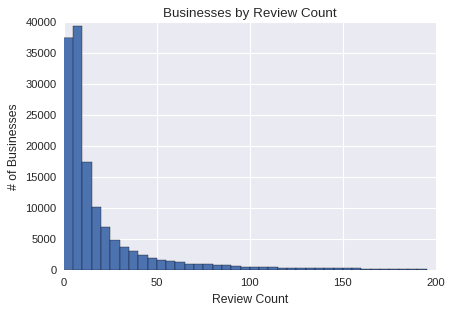

In [26]:
sns.plt.hist(df.review_count, bins=range(0,200,5))
sns.plt.xlabel('Review Count')
sns.plt.ylabel('# of Businesses')
sns.plt.title('Businesses by Review Count')

## Distribution of stars

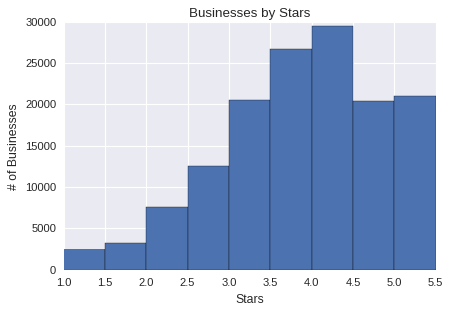

In [27]:
sns.plt.hist(df.stars, bins=np.linspace(1.,5.5,10))
sns.plt.xlabel('Stars')
sns.plt.ylabel('# of Businesses')
sns.plt.title('Businesses by Stars')

## Business Categories

In [18]:
def to_list(value):
    try:
        return literal_eval(value)
    except:
        return []

df['categories'] = df.categories.apply(to_list)

In [19]:
df['categories'] = df.categories.apply(lambda d: {'cat': {c: True for c in d}})

In [20]:
biz_cats = json_normalize(df.categories)

## Top 10 categories

In [21]:
pd.DataFrame({'n':biz_cats.notnull().sum()}).sort_values(by='n', ascending=False)[:10]

,n
cat.Restaurants,48485
cat.Shopping,22466
cat.Food,21189
cat.Beauty & Spas,13711
cat.Home Services,11241
cat.Nightlife,10524
cat.Health & Medical,10476
cat.Bars,9087
cat.Automotive,8554
cat.Local Services,8133


## Business Attributes

In [22]:
def attr_to_dict(value):
    try:
        return dict(map(lambda w: (w[0], w[1] == 'True'), map(lambda v: v.split(': '), literal_eval(value))))
    except:
        return {}

df['attributes'] = df.attributes.apply(attr_to_dict)

In [23]:
df['attributes'] = df.attributes.apply(lambda d: {'attr': d})

In [24]:
biz_attrs = json_normalize(df.attributes)

## Top 10 attributes

In [25]:
pd.DataFrame({'n':biz_attrs.notnull().sum()}).sort_values(by='n', ascending=False)[:10]

,n
attr.BusinessAcceptsCreditCards,110105
attr.RestaurantsPriceRange2,90300
attr.BusinessParking,83173
attr.BikeParking,66963
attr.GoodForKids,54636
attr.RestaurantsTakeOut,50514
attr.OutdoorSeating,47657
attr.RestaurantsGoodForGroups,46706
attr.RestaurantsDelivery,43844
attr.RestaurantsReservations,43485


## Frequencies of attribute's values

In [75]:
for col in biz_attrs.columns:
    print('%s: %s' % (col, Counter(biz_attrs[col])))

attr.AcceptsInsurance: Counter({nan: 137105, True: 5255, False: 1712})
attr.AgesAllowed: Counter({nan: 143696, False: 376})
attr.Alcohol: Counter({nan: 102191, False: 41881})
attr.Ambience: Counter({nan: 104385, False: 39687})
attr.BYOB: Counter({nan: 143170, False: 855, True: 47})
attr.BYOBCorkage: Counter({nan: 142676, False: 1396})
attr.BestNights: Counter({nan: 138211, False: 5861})
attr.BikeParking: Counter({nan: 77109, True: 51914, False: 15049})
attr.BusinessAcceptsBitcoin: Counter({nan: 136963, False: 6931, True: 178})
attr.BusinessAcceptsCreditCards: Counter({True: 103200, nan: 33967, False: 6905})
attr.BusinessParking: Counter({False: 83173, nan: 60899})
attr.ByAppointmentOnly: Counter({nan: 114178, False: 15693, True: 14201})
attr.Caters: Counter({nan: 115202, True: 14938, False: 13932})
attr.CoatCheck: Counter({nan: 136689, False: 6372, True: 1011})
attr.Corkage: Counter({nan: 143421, False: 511, True: 140})
attr.DietaryRestrictions: Counter({nan: 143849, False: 223})
attr.